### カーネル関数とは何か
基本となる線形モデル
$$
y=\boldsymbol{w}^T\boldsymbol{x}
$$
そのものでは、$\boldsymbol{w}$と$y$の間の直線的な関係しかモデル化できない。
一般に$\boldsymbol{x}$に何か定まった非線形変換を施して高次元空間に所蔵することを**特徴抽出**と呼ぶ。
一般に、$\phi_1,\cdots,\phi_d$という非線形関数で特徴抽出されたベクトルを$\boldsymbol{\phi}(\boldsymbol{x})=(\phi_1(\boldsymbol{x}),\cdots,\boldsymbol{\phi}_d(\boldsymbol{w}))^T$と書くこととする。
特徴抽出された空間において線形モデルを考えると、
$$
f_w(\boldsymbol{x})=\boldsymbol{w}^T\boldsymbol{\phi}(\boldsymbol{x})=\sum_{m=1}^dw_m\phi_m(\boldsymbol{x})
$$
と書ける。

特徴抽出をしない線形モデルでは入力$\boldsymbol{x}$は実ベクトルである必要があったが、特徴ベクトルが実ベクトルであれば元の$\boldsymbol{x}$はもはや実ベクトルである必要はない。$\boldsymbol{x}$が文字列やグラフ構造といった複雑な対象の場合でも実ベクトルの場合と同じように手法を適用できるようになる。ここで、変数$\boldsymbol{x}$の集合を$\chi$と書くこととする。

#### 特徴抽出を用いたカーネル関数の定義
$\chi$の二つの要素$\boldsymbol{x},\boldsymbol{x}'$に対し、カーネル関数$k(\boldsymbol{x},\boldsymbol{x}')$は$\boldsymbol{x},\boldsymbol{x}'$それぞれの特徴ベクトル同士の内積
$$
k(\boldsymbol{x},\boldsymbol{x}')=\boldsymbol{\phi}(\boldsymbol{x})^T\boldsymbol{\phi}(\boldsymbol{x}')=\sum_{m=1}^d\phi_m(\boldsymbol{x})\phi_m(\boldsymbol{x}')
$$
として定義される。

#### 内積のカーネルによる表現
$\boldsymbol{\phi}(\boldsymbol{x})$とパラメータの内積は、十分多くの$\boldsymbol{x}_1,\boldsymbol{x}_2,\cdots$を適切に選ぶことにより
$$
f(\boldsymbol{x})=\sum_i\alpha_ik(\boldsymbol{x}_i,\boldsymbol{x})
$$
の形でいくらでも近似できる。
カーネル関数が$k(\boldsymbol{x}_i,\boldsymbol{x})=\boldsymbol{\phi}(\boldsymbol{x}_i)^T\boldsymbol{\phi}(\boldsymbol{x})$で定義されるので、$f$は
$$
f(\boldsymbol{x})=\sum_i\alpha_i\boldsymbol{\phi}(\boldsymbol{x}_i)^T\boldsymbol{\phi}(\boldsymbol{x})
$$
と書ける。
これは、パラメータを
$$
\boldsymbol{w}=\sum_i\alpha_i\boldsymbol{\phi}(\boldsymbol{x}_i)
$$
という形に限定してよいということを意味している。この性質はカーネル関数のもつ「再生性」という性質から導ける。
サンプル点での線形和の形で書けるためには、さらに条件が必要で、それはある特別な正則化を行うことによって可能となる。

#### リプレゼンター定理
損失関数に正則化を加えて最適化する問題において、正則化項が$\lambda |\boldsymbol{w}|^2$という形をしていれば、最適解$\boldsymbol{x}^{(i)}(i=1,2,\cdots,n)$をサンプル点として、
$$
f(\boldsymbol{x})=\sum_{i=1}^n\alpha_ik(\boldsymbol{x}^{(i)},\boldsymbol{x})
$$
の形に書ける。(証明は省略)
前章で用いた、$\lambda\boldsymbol{\alpha}^TK\boldsymbol{\alpha}$という正則化項はリプレゼンター定理の正則化項$\lambda |\boldsymbol{w}|^2$と同じである。これは$\boldsymbol{w}=\sum_{i=1}^n\alpha_i\boldsymbol{\phi}(\boldsymbol{x}^{(i)})$から計算できる。

$$
f(x)=\sum_{m=1}^dw_mx^m
$$
で計算される関数は、リプレゼンター定理の条件を満たすように$\boldsymbol{\alpha}^TK\boldsymbol{\alpha}$の正則化項を取って適当な損失関数を最小化するように最適化すれば、
$$
f(x)=\sum_{i=1}^n\alpha_ik(x^{(i)}, x)=\sum_{i=1}^n\alpha_i\sum_{m=1}^d(x^{(i)})^mx^m
$$
のようにサンプル点$x^{(i)}(i=1,\cdots,n)$を使って表される。
$d<n$のとき、つまりサンプル数が多項式の次数よりも大きいとき、$d$次多項式を表現するのに$n$個のパラメータを使っているので冗長な表現となる。
しかし、$n>d$のとき、つまりサンプル数よりも大きな次数の多項式を当てはめる場合には、最適化すべきパラメータ数の少ないコンパクトな表現となる。
このことから、カーネル関数を用いた表現は、特徴ベクトルの次元が大きいときにパラメータ数を減らす働きをすることがわかる。

### 正定値性からの導入
カーネル関数は特徴量で見たときの$\boldsymbol{x}$と$\boldsymbol{x}'$の類似度を表わしていると考えることができる。
逆に、$\boldsymbol{x}$と$\boldsymbol{x}'$の類似度を表すような関数$k(\boldsymbol{x},\boldsymbol{x}')$があるときにそれをカーネル関数として扱うことができるが、条件がある。
類似度をカーネルと結び付けるための鍵となるのは正定値性という性質である。
ある関数$k(\boldsymbol{x},\boldsymbol{x}')$が正定値であるとは、任意の$n$個の点$\boldsymbol{x}_1,\cdots,\boldsymbol{x}_n$から計算される行列
$$
K=\left(
\begin{array}{cccc}
k(\boldsymbol{x}^{(1)},\boldsymbol{x}^{(1)}) & k(\boldsymbol{x}^{(2)},\boldsymbol{x}^{(1)}) & \cdots & k(\boldsymbol{x}^{(n)},\boldsymbol{x}^{(1)}) \\
k(\boldsymbol{x}^{(1)},\boldsymbol{x}^{(2)}) & k(\boldsymbol{x}^{(2)},\boldsymbol{x}^{(2)}) & \cdots & k(\boldsymbol{x}^{(n)},\boldsymbol{x}^{(2)}) \\
\vdots & \vdots & & \vdots \\
k(\boldsymbol{x}^{(1)},\boldsymbol{x}^{(n)}) & k(\boldsymbol{x}^{(2)},\boldsymbol{x}^{(n)}) & \cdots & k(\boldsymbol{x}^{(n)},\boldsymbol{x}^{(n)})
\end{array}
\right)
$$

を考えたとき(この行列をグラム行列という)、その2次形式が常に非負、すなわち
$$
\sum_{i=1}^n\sum_{j=1}^n\alpha_i\alpha_jK_{ij}\geq0
$$
が任意の$n$次元ベクトル$\boldsymbol{\alpha}=(\alpha_1,\cdots,\alpha_n)^T$について成り立つことである。
#### カーネルと正定値性
特徴ベクトルの内積として定義したカーネル関数は正定値である。
一方、$\chi×\chi$上の任意の正定値関数$k(\boldsymbol{x},\boldsymbol{x}')$が対称なら、それはなんらかの特徴ベクトルの間の内積と見なせる。
あらかじめ正定値性を満たすことが分かっている関数をもってくれば、内積計算が不要となる。
このように正定値性をカーネル関数の定義とすれば、計算量を減らすことができ、これを「カーネルトリック」と呼ぶ。

例えば、
$$
k(\boldsymbol{x},\boldsymbol{x}')=\exp(-\beta|\boldsymbol{x}-\boldsymbol{x}'|^2)
$$
は、ガウスカーネルと呼ばれ、特徴ベクトルの間の内積としても表現できて正定値性も満たす。
さらに特徴ベクトルは無限次元となっている。
実数ベクトルに対してガウスカーネルと同様によく使われるカーネルに、多項式カーネル
$$
k(\boldsymbol{x},\boldsymbol{x}')=(\boldsymbol{x}^T\boldsymbol{x'}+c)^p
$$
がある($p$は自然数、$c\geq0$)。

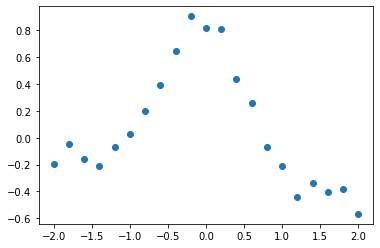

In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

x1 = np.arange(-2,2.1,0.2)
y = -0.1*x1-0.4 + norm.pdf(x1*2)*3 + np.random.rand(len(x1))*0.2
plt.plot(x1,y,'o')

In [9]:
def rbf(x1, x2, beta):
    return np.exp(-beta*((x1-x2).T@(x1-x2)))

def polynomial(x1, x2, c, p):
    return (x1@x2.T+c)**p

def Kernel(x1, x2, kernel, **param):
    return np.array([[kernel(x1=xx1, x2=xx2, **param) for xx2 in x2] for xx1 in x1])

(-1.0, 1.0)

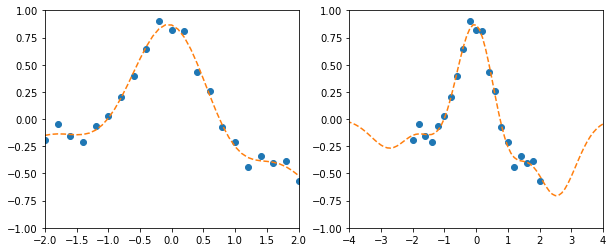

In [34]:
lmd = 0.01

X = x1.reshape(len(x1),-1)
y = y.reshape(len(y),-1)

x2 = np.arange(-4.1,4.2,0.1).reshape(83,1)
K1 = Kernel(X, X, rbf, beta=1)
K = Kernel(X, x2, rbf, beta=1)

alpha2 = (np.linalg.inv(K1 + lmd * np.identity(len(x1)))@y).reshape(len(X), -1)

fig, ax = plt.subplots(1,2,figsize=(10,4))
ax[0].plot(x1, y,'o')
ax[0].plot(x2, K.T@alpha2,'--' ,label='lambda='+str(lmd))
ax[0].set_xlim(-2,2)
ax[0].set_ylim(-1,1)

ax[1].plot(x1, y,'o')
ax[1].plot(x2, K.T@alpha2,'--' ,label='lambda='+str(lmd))
ax[1].set_xlim(-4,4)
ax[1].set_ylim(-1,1)

(-1.0, 20.0)

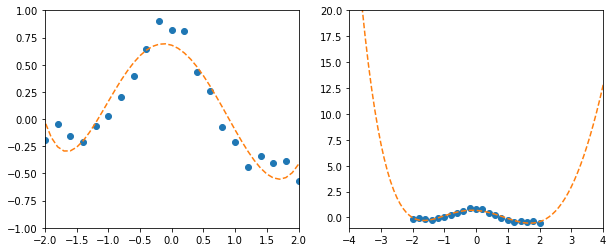

In [35]:
K1 = Kernel(X, X, polynomial, c=1, p=5)
K = Kernel(X, x2, polynomial, c=1, p=5)
alpha2 = (np.linalg.inv(K1 + lmd * np.identity(len(x1)))@y).reshape(len(X), -1)

fig, ax = plt.subplots(1,2,figsize=(10,4))

ax[0].plot(x1, y,'o')
ax[0].plot(x2, K.T@alpha2,'--' ,label='lambda='+str(lmd))
ax[0].set_xlim(-2,2)
ax[0].set_ylim(-1,1)

ax[1].plot(x1, y,'o')
ax[1].plot(x2, K.T@alpha2,'--' ,label='lambda='+str(lmd))
ax[1].set_xlim(-4,4)
ax[1].set_ylim(-1,20)

あてはまりの結果はガウスカーネルと多項式カーネルで大差がないように見えるが、サンプル領域の外側まで広げて考えてみると、それぞれ異なった特徴をもっている。

### 汎化能力の評価とモデル選択
カーネル法では、サンプル数と同じだけ自由度があるため、そのままではサンプルに過度にフィットする過学習を起こしてしまう。
汎化能力を高めるためにモデルの複雑度を調整することをモデル選択という。
ここでは、汎化能力をサンプルに基づいて簡便かつ実用的に評価する方法としてクロスバリデーション(CV)という手法を説明する。
#### クロスバリデーション
クロスバリデーションは、学習用サンプルとテスト用サンプルの分け方をいろいろ変えて得たテスト誤差を平均するという方法である。

k-foldクロスバリデーション法(k-fold CV)
1. まずサンプルを$k$個のグループに分ける
2. $i=1,\cdots,k$に対し以下を繰り返す
　1. $i$番目のグループを除いたデータで学習を行う
　2. $i$番目のグループでテスト誤差を評価し$r_i$とおく
3. $\sum_{i=1}^kr_i/k$をテスト誤差の推定値(クロスバリデーション誤差)とする

k-foldクロスバリデーション法は、一般には$k$回の学習を必要とするため計算量がかかるが、線形の場合には全サンプルを用いた1回の学習結果だけを使ってクロスバリデーション誤差を計算できる。

#### 線形モデルのleave-one-outクロスバリデーション
サンプルが$n$個あるとき、n-foldクロスバリデーションは一つだけのサンプルをテストデータとして除いておく方法なので、特にleave-one-outクロスバリデーションと呼ばれている。
関数近似で$y=f(\boldsymbol{x})$という関数を学習したとする。
このとき、$i$番目のサンプルの入力$\boldsymbol{x}^{(i)}$をこの学習した関数に入れると$\tilde{y}^{(i)}=f(\boldsymbol{x}^{(i)})$という値が得られる。
これはサンプルの出力$y^{(i)}$のノイズの成分を除去した推定値と見なすことができる。
線形回帰やカーネル回帰では、$\tilde{\boldsymbol{y}}=(\tilde{y}^{(1)},\tilde{y}^{(2)},\cdots,\tilde{y}^{(n)})^T$が$\boldsymbol{y}=(y^{(1)},y^{(2)},\cdots,y^{(n)})^T$の線形変換で書くことができる。
実際、カーネル回帰の場合
$$
\tilde{\boldsymbol{y}}=K\boldsymbol{\alpha}=(K+\lambda I_n)^{-1}K\boldsymbol{y}
$$
という形をしている。
一般に$\tilde{\boldsymbol{y}}=H\boldsymbol{y}$という線形関係があるときを考える。
カーネル回帰の場合は$H=(K+\lambda I_n)^{-1}K$である。
このときleave-one-outクロスバリデーション誤差は、学習サンプルとテストサンプルを分ける手続きなしで、サンプル出力$y^{(i)}$とノイズ成分を除去した推定値$\tilde{y}^{(i)}$の重み付きの誤差平均として、
$$
CV=\frac{1}{n}\sum_{i=1}^n\biggl(\frac{y^{(i)}-\tilde{y}^{(i)}}{1-H_{ii}} \biggr)^2
$$
で与えられる。ただし、$H_{ii}$は$H$の第$i$成分である。
#### 具体例
関数の複雑度を制御しているのは正則化パラメータの$\lambda$とガウスカーネルに含まれる$\beta$である。
まず、$\beta=1$に固定し、$\lambda$を変化させた例を示す。

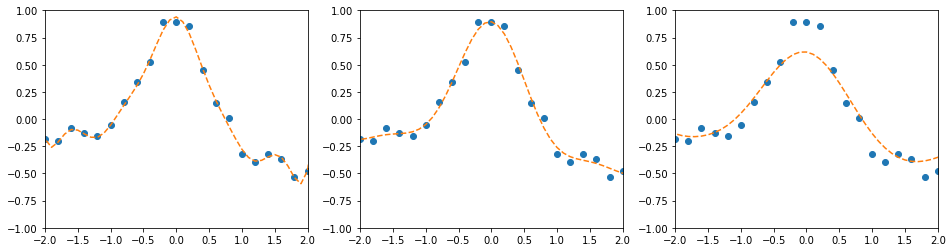

In [121]:
x = np.arange(-2,2.1,0.2)
x1 = x.reshape(len(x),-1)
y = -0.1*x-0.4 + norm.pdf(x*2)*3 + np.random.rand(len(x))*0.2
y = y.reshape(len(y),-1)

x2 = np.arange(-4.1,4.2,0.1).reshape(83,1)

K1 = Kernel(x1, x1, rbf, beta=1)
K = Kernel(x1, x2, rbf, beta=1)

n = len(x)
lmds = [1e-6, 0.01, 1]

cv_errer = []
sample_error = []
fig, ax = plt.subplots(1,3,figsize=(16,4))
for i in range(3):
    H = np.linalg.inv(K1 + lmds[i] * np.identity(len(x1)))@K1
    alpha = (np.linalg.inv(K1)@H@y).reshape(len(x1), -1)
    
    CV = np.sum(((y - K1.T@alpha)/(1-np.diag(H).reshape(-1,1)))**2) / n
    E = np.sum((y - K1.T@alpha)**2) / n
    
    cv_errer.append(CV)
    sample_error.append(E)
    
    ax[i].plot(x, y,'o')
    ax[i].plot(x2, K.T@alpha,'--' ,label='lambda='+str(lmd))
    ax[i].set_xlim(-2,2)
    ax[i].set_ylim(-1,1)

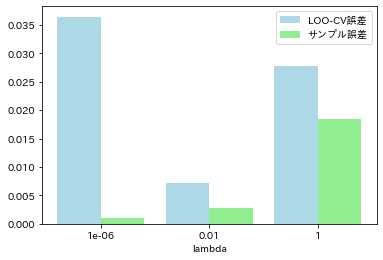

In [147]:
import japanize_matplotlib

plt.bar(x=np.arange(3)-0.2, height=cv_errer, width=0.4, label='LOO-CV誤差', align="center", color='lightblue');
plt.bar(x=np.arange(3)+0.2, height=sample_error, width=0.4, label='サンプル誤差', align="center", color='lightgreen');
plt.xticks(range(3), lmds);
plt.xlabel('lambda')
plt.legend();

次に、$\lambda=0.01$に固定したまま$\beta$を変化させたときの様子を示す。

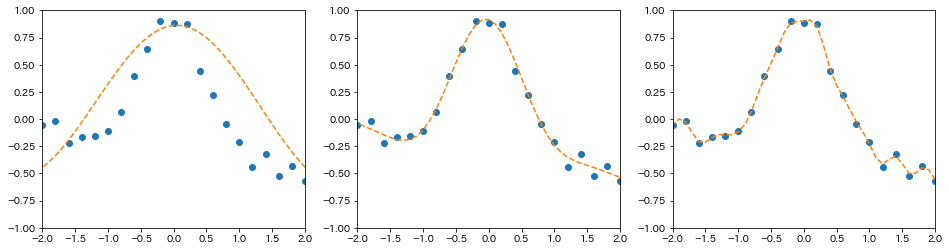

In [148]:
x = np.arange(-2,2.1,0.2)
x1 = x.reshape(len(x),-1)
y = -0.1*x-0.4 + norm.pdf(x*2)*3 + np.random.rand(len(x))*0.2
y = y.reshape(len(y),-1)

x2 = np.arange(-4.1,4.2,0.1).reshape(83,1)

n = len(x)
betas = [0.1, 1, 10]

cv_errer = []
sample_error = []
fig, ax = plt.subplots(1,3,figsize=(16,4))
for i in range(3):
    K1 = Kernel(x1, x1, rbf, beta=betas[i])
    K = Kernel(x1, x2, rbf, beta=betas[i])

    H = np.linalg.inv(K1 + 0.01 * np.identity(len(x1)))@K1
    alpha = (np.linalg.inv(K1)@H@y).reshape(len(x1), -1)
    
    CV = np.sum(((y - K1.T@alpha)/(1-np.diag(H).reshape(-1,1)))**2) / n
    E = np.sum((y - K1.T@alpha)**2) / n
    
    cv_errer.append(CV)
    sample_error.append(E)
    
    ax[i].plot(x, y,'o')
    ax[i].plot(x2, K.T@alpha,'--' ,label='lambda='+str(lmd))
    ax[i].set_xlim(-2,2)
    ax[i].set_ylim(-1,1)

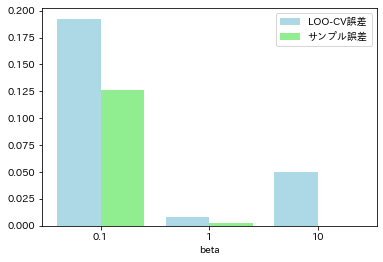

In [149]:
plt.bar(x=np.arange(3)-0.2, height=cv_errer, width=0.4, label='LOO-CV誤差', align="center", color='lightblue');
plt.bar(x=np.arange(3)+0.2, height=sample_error, width=0.4, label='サンプル誤差', align="center", color='lightgreen');
plt.xticks(range(3), betas);
plt.xlabel('beta')
plt.legend();

(44,)